# Pokemon, Can You Predict Their Types From Stats?
## A Tutorial
### By Joey Moore and Siddharth Karunakaran

Pokemon is a popular franchise that is based around the idea of monsters fighting each other to see who is the best. One of the unique factors of Pokemon are their typings, and statistics in 6 major categories: HP(Healh Points), Attack, Defense, Special Attack, Special Defense, and Speed. Each Pokemon has certain affinities for certain elements, this designates their typing. In this tutorial, we will break down all Pokemon to see if there is a relationship between the base statistics of a Pokemon and the typing that it has.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model

Our Data was taken from a database online in an easily digestable CSV format. This specific database was taken from https://www.kaggle.com/mlomuscio/pokemon?select=PokemonData.csv

In [5]:

data = pd.read_csv("Pokemon.csv")
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


This dataset is called a Pokedex. It holds the name, entry number, typing(s), base stats, total stats, generation introduced, and legendary status. For the purposes of this tutorial, we can disregard the name, entry number, and generation. They won't play a role in the analysis. 

In [15]:
#Create a 2D array of values detailing the average of each stat for each typing

model = pd.DataFrame()

model['Type'] = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']

stats = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total_w_sec', 'HP_w_sec', 'Attack_w_sec', 'Defense_w_sec', 'Sp. Atk_w_sec', 'Sp. Def_w_sec', 'Speed_w_sec', 'Total_Num_Primary', 'Total_Num_Secondary']


for column in stats:
    model[column] = 0

num_per_type = data['Type 1'].value_counts()
num_per_type_2 = data['Type 2'].value_counts()

for i in num_per_type.index:
    m = model.loc[model['Type'] == i] 
    model.loc[m.index, 'Total_Num_Primary'] = num_per_type[i]


for i in num_per_type_2.index:
    m = model.loc[model['Type'] == i]
    model.loc[m.index, 'Total_Num_Secondary'] = num_per_type_2[i] + model.loc[m.index, 'Total_Num_Primary']

for index1, typing in model.iterrows():
    for index2, pokemon in data.iterrows():
        if pokemon['Type 1'] == typing['Type']:
            for index in range(4,11):
                model.loc[index1, data.columns[index]] += pokemon[index]
                model.loc[index1, data.columns[index] + '_w_sec'] += pokemon[index]

        if pokemon['Type 2'] and pokemon['Type 2'] == typing['Type']:
            for index in range(4,11):
                model.loc[index1, data.columns[index] + '_w_sec'] += pokemon[index]

    for col_index in range(1,8):
        model.loc[index1, model.columns[col_index]] /= model.loc[index1,'Total_Num_Primary']
        model.loc[index1, model.columns[col_index+7]] /= model.loc[index1,'Total_Num_Secondary']

#normalize values around 1 to account for variability between weak/strong pokemon
    for col_index in range(2,8):
        model.loc[index1, model.columns[col_index]] /= (model.loc[index1,'Total']/6)
        model.loc[index1, model.columns[col_index+7]] /= (model.loc[index1,'Total_w_sec']/6)

model

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_w_sec,HP_w_sec,Attack_w_sec,Defense_w_sec,Sp. Atk_w_sec,Sp. Def_w_sec,Speed_w_sec,Total_Num_Primary,Total_Num_Secondary
0,Grass,421.142857,0.958412,1.043080,1.008684,1.104138,1.003392,0.882293,417.926316,0.948291,1.054681,1.051659,1.047125,1.026572,0.871672,70,95
1,Fire,458.076923,0.915617,1.110327,0.887657,1.165491,0.945844,0.975063,467.109375,0.901154,1.080381,0.900351,1.194581,0.954742,0.968791,52,64
2,Water,430.455357,1.004460,1.033582,1.016780,1.042791,0.982929,0.919458,429.095238,0.993120,1.030629,1.038841,1.045611,0.983132,0.908667,112,126
3,Bug,378.927536,0.900711,1.123767,1.119865,0.852979,1.026008,0.976669,379.527778,0.896948,1.134524,1.124204,0.846886,1.022323,0.975115,69,72
4,Normal,401.683673,1.154274,1.097422,0.893941,0.833736,0.951861,1.068767,402.068627,1.145107,1.084246,0.889517,0.851771,0.951257,1.078101,98,102
5,Poison,399.142857,1.010916,1.122584,1.034538,0.908375,0.967967,0.955619,397.693548,0.944397,1.068013,0.961674,1.024212,1.017155,0.984548,28,62
6,Electric,443.409091,0.809124,0.934905,0.897078,1.218145,0.997335,1.143414,444.840000,0.852441,0.937685,0.897491,1.199892,0.993796,1.118694,44,50
7,Ground,437.500000,1.011857,1.313143,1.163571,0.774429,0.860571,0.876429,441.074627,1.028154,1.260625,1.193016,0.832634,0.881971,0.803600,32,67
8,Fairy,413.176471,1.076310,0.893508,0.954157,1.140376,1.230068,0.705581,415.925000,0.987798,0.888261,1.015568,1.103564,1.199134,0.805674,17,40
9,Fighting,416.444444,1.006403,1.394344,0.949840,0.765208,0.932231,0.951974,470.113208,0.951678,1.335768,0.945176,0.854150,0.936507,0.976722,27,53


Now we have taken the stats for each Pokemon and used it to create a new dataframe that holds the normalized averages of each stat by type, as well as the total number of Pokemon that exist for each type. Since some Pokemon have lower overall stats than others, it is important to normalize the data so we can see if the stats follow a pattern rather than the value of the stats.

<AxesSubplot:>

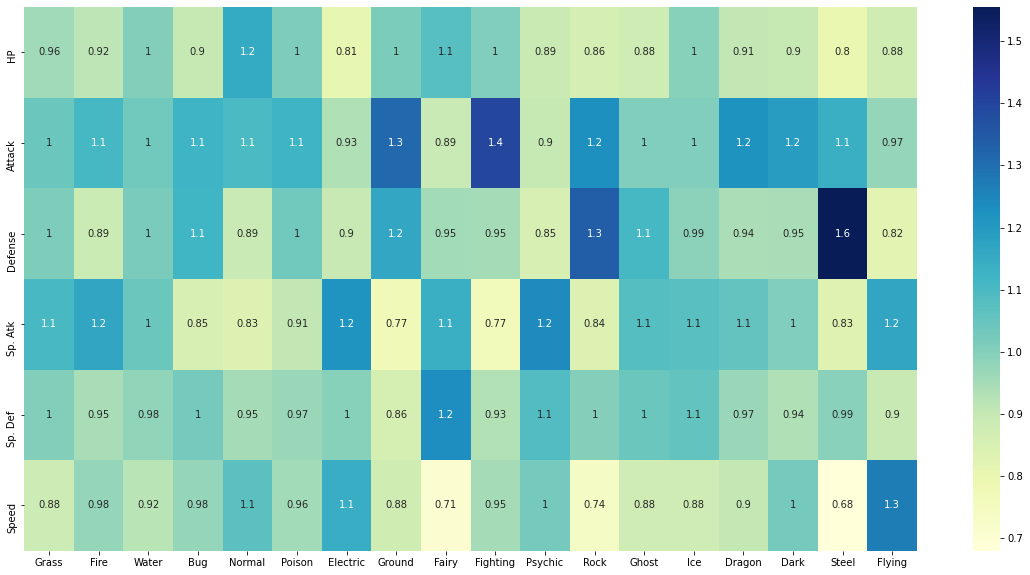

In [7]:
col1 = model['Type']
col2 = model[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
fig, ax = plt.subplots(figsize=(20,10))  
sb.heatmap(col2.transpose(), xticklabels=col1, annot = True, ax = ax, cmap="YlGnBu")

The heat map above shows the relationship of typing to stats. For the most part, it there is nothing too unique, but some types like Rock and Steel have higher defense and Fighting and Ground have higher attack. While these points may play a role in the predictiblilty of typing, there is no garuntee that they aren't the result of outliers. 

<AxesSubplot:xlabel='Type', ylabel='Total'>

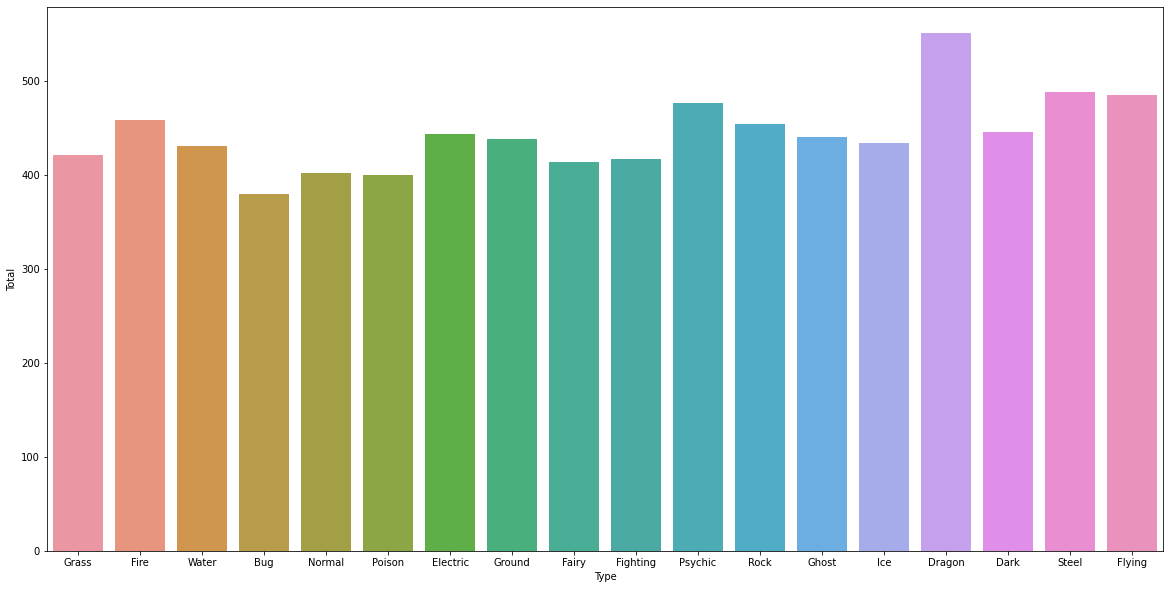

In [8]:
col3 = model['Total']
fig, ax = plt.subplots(figsize=(20,10)) 
sb.barplot(x = col1, y = col3, ax =ax)

We also account for the overall highest of stats based on typings. Dragon types are shown to be the most powerful in overall stats. On the other hand, Bug appears to have the lowest overall stats. This makes sense logically, and is a first step towards drawing more meaning out of these seemingly random statistics. It is also worth noting that the types all hover around the 400 total points area. This means that there is some balance among the different types of pokemon.

Despite that static nature of the data, it is worth noting that certain Pokemon will always have significatly better stats than others because of their status as Legendary. This could skew the data slightly, so it is worth comparing the the averages of Pokemon that are not Legendary.

In [9]:
nonLegend = pd.DataFrame(data)
nonLegend = nonLegend[nonLegend['Legendary'] == False]
nonLegend

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


In [10]:
model2 = pd.DataFrame()
model2['Type'] = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']
stats = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total_Num']


for column in stats:
    model2[column] = 0

num_per_type = nonLegend['Type 1'].value_counts()

m = model2.loc[model2['Type'] == 'Water'].index

for i in num_per_type.index:
    m = model2.loc[model2['Type'] == i]
    model2.loc[m.index, 'Total_Num'] = num_per_type[i]


for index1, typing in model2.iterrows():
    for index2, pokemon in nonLegend.iterrows():
        if pokemon['Type 1'] == typing['Type']:
            for index in range(4,11):
                model2.loc[index1, nonLegend.columns[index]] += pokemon[index]
    for col_index in range(1,8):
        model2.loc[index1, model2.columns[col_index]] /= model2.loc[index1,'Total_Num']
#normalize values around 1 to account for variability between weak/strong pokemon
    for col_index in range(2,8):
        model2.loc[index1, model2.columns[col_index]] /= (model2.loc[index1,'Total']/6)



model2

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Num
0,Grass,413.432836,0.956968,1.046643,1.020000,1.107942,1.002022,0.866426,67
1,Fire,442.127660,0.910395,1.115399,0.875746,1.167084,0.936959,0.994418,47
2,Water,421.398148,1.012634,1.036233,1.025027,1.029509,0.970710,0.925886,108
3,Bug,378.927536,0.900711,1.123767,1.119865,0.852979,1.026008,0.976669,69
4,Normal,395.572917,1.160184,1.093351,0.890323,0.832653,0.950362,1.073127,96
5,Poison,399.142857,1.010916,1.122584,1.034538,0.908375,0.967967,0.955619,28
6,Electric,429.750000,0.800349,0.923211,0.913438,1.204538,1.009773,1.148691,40
7,Ground,405.714286,1.047359,1.301408,1.180458,0.706162,0.880986,0.883627,28
8,Fairy,396.500000,1.072509,0.865385,0.966583,1.138714,1.269231,0.687579,16
9,Fighting,416.444444,1.006403,1.394344,0.949840,0.765208,0.932231,0.951974,27


In [11]:
diff = pd.DataFrame()
diff['Type'] = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']
change = model['Total']-model2['Total']
diff['change'] = change
diff

,Type,change
0,Grass,7.710021
1,Fire,15.949264
2,Water,9.057209
3,Bug,0.000000
4,Normal,6.110757
5,Poison,0.000000
6,Electric,13.659091
7,Ground,31.785714
8,Fairy,16.676471
9,Fighting,0.000000


As we can see, some types saw no change, but others saw a dramatic change without Legendaries. This seems to be mostly due to sample size between types as it can be extremely varied. For example, flying is almost always a secondary type, meaning the number of pokemon with flying as their primary type is only 4! This means that removing the 2 legendaries in that sample skews the data downward heavily. This was a recurring issue moving forward in the analysis.

<AxesSubplot:>

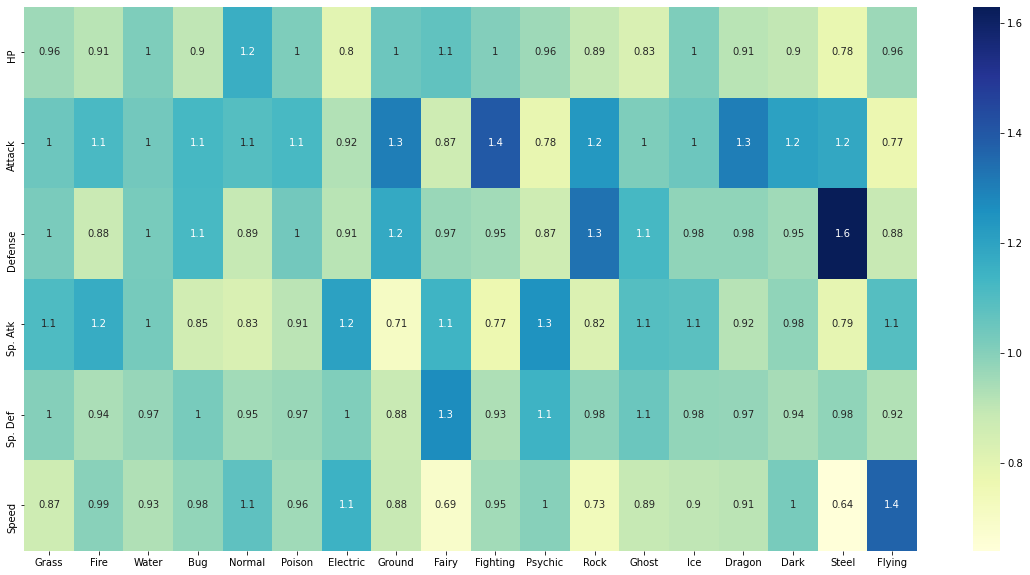

In [12]:
col1 = model2['Type']
col2 = model2[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
fig, ax = plt.subplots(figsize=(20,10))  
sb.heatmap(col2.transpose(), xticklabels=col1, annot = True, ax = ax, cmap="YlGnBu")

<AxesSubplot:xlabel='Type', ylabel='Total'>

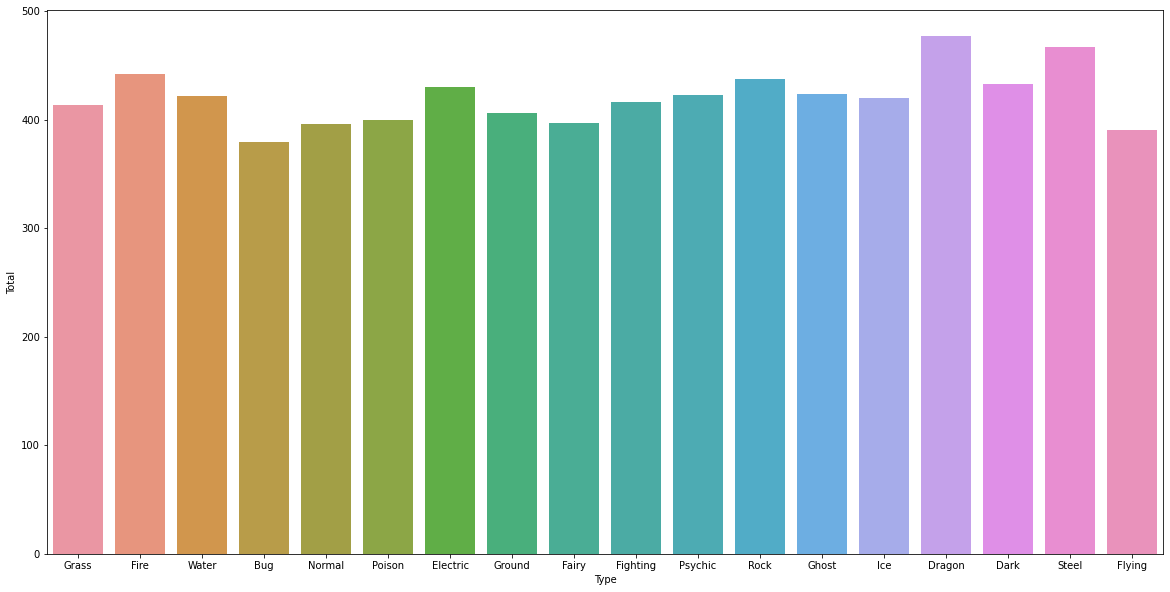

In [13]:
col3 = model2['Total']
fig, ax = plt.subplots(figsize=(20,10)) 
sb.barplot(x = col1, y = col3, ax =ax)

While the total averages saw some changes as a result of removing legendaries, the general shape of the graph hasn't changed. This shows that while legendaries do play a role in the data, it is does not make a large difference in the overall stats of the Pokemon.

As we head into the predictive aspect of the tutorial. It is worth noting that the data does not seem to follow any particular trend. The heat map showed that while there were some types of Pokemon that had a strong tie to a stat, most were evenly spread out and didn't have a significant impact. If there is a trend that we aren't seeing, the predictive model should be able to figure out what it is and make the correct call.

The model we chose was created by finding the average stat values by type and normalizing them around 1. To predict a pokemons typing based on this model given only stats, we need to calculate residuals and try to find the closest match. After playing around with the model created using just a pokemon's primary typing, we were seeing less than promising results. We then created another model (labeled in the code with _sec for secondary). This model took into account pokemon's secondary types when creating averages with which to calculate residuals. We were excited to see if that would increase our predictive models success rate or not. 

In [14]:
#use the predictive model to guess a pokemon's typing based on its stats alone

def predict(pok):
    #normalize the stats around 1
    for col in range (1,7):
        pok[col] = (6*pok[col])/pok[0]
    arr = np.empty(18)
    resid = 0
    for index, Type in model.iterrows():
        for col in range(1,7):
            resid += abs(pok[col]-model.iloc[index, col+1])
        arr[index] = resid + 1/model.loc[index, 'Total_Num_Primary']
        resid = 0
    result_ind = np.where(arr == np.amin(arr))

    return(model.loc[result_ind[0][0], 'Type'])

def predict_w_sec(pok):
    #normalize the stats around 1
    for col in range (1,7):
        pok[col] = (6*pok[col])/pok[0]
    arr = np.empty(18)
    resid = 0
    for index, Type in model.iterrows():
        for col in range(1,7):
            resid += abs(pok[col]-model.iloc[index, col+8])
        arr[index] = resid
        resid = 0
    result_ind = np.where(arr == np.amin(arr))
    return(model.loc[result_ind[0][0], 'Type'])

When analysing the predictive model, we used a pretty standard approach, feeding back in the original data to see if the type could be predicted given just the stats. Unfortunately, the distinctions between typings seemed to be just a bit too convoluted, and not quite distinct enough to have a model with high accuracy. The model certainly beats randomly guessing, but isn't as accurate as I had hoped. When applying the same analysis to the model created with secondary typings as well, it seems it just muddys the waters even further, with the model having a hard time telling any apart, and doing a terrible job predicting.

In [16]:
#Analysis of algorithms
count = 0
count_sec = 0
model['Guessed_Correct'] = 0
model['Guessed_Correct_sec'] = 0
model['Guessed_in_Error'] = 0
model['Guessed_in_Error_sec'] = 0
for index, pok in data.iterrows():
    guess = predict(pok[4:11])
    guess_sec = predict_w_sec(pok[4:11])
    #  or guess == pok[3]:

    if guess == pok[2]:
        count+=1
        model.loc[model['Type'] == guess, 'Guessed_Correct'] += 1
    else:
        model.loc[model['Type'] == guess, 'Guessed_in_Error'] +=1
    if guess_sec == pok[2]:
        count_sec+=1
        model.loc[model['Type'] == guess_sec, 'Guessed_Correct_sec'] += 1
    else:
        model.loc[model['Type'] == guess_sec, 'Guessed_in_Error_sec'] +=1

print('# Correct for Primary: ',count, '# Correct with Secondary: ', count_sec)


# Correct for Primary:  127 # Correct with Secondary:  57


After numerous attempts to find a way to predict a Pokemon's typing, we found that there is no effective way to predict a Pokemon's typing from just its stats given techniques we're familiar with. This matches the data we got from the Heat Map. While were able to get the computer to predict the typing right some of the time, there is no significant difference in the way that the stats were distributed that made it more likely to be one type. This matches what would be expected of Pokemon since it has changed the approach to the meta so often. The game developers try to introduce new Pokemon that will allow for diverse combat and move pools. If they were to create a trend that made it easy to predict a Pokemon's typing, it would take away from the experience of the game. Even when legendary Pokemon were removed from the data, the overall difference in stats was miniscule. This shows that a majority of the Pokemon are diverse and different. Each one can offer a unique experience of gameplay.